## Project Planning Stage (Individual)
**Group: 19**   
**Section: 003**  
**Name: Finn Piney #46957874**  

### Loading Libraries and Datasets

In [34]:
# Loading libraries
library(tidyverse)
library(repr)
library(tidymodels)

# Loading the two datasets directly from their URL's on Github in order to have the full file be reproducible
url_players <- "https://raw.githubusercontent.com/Finnypiney/individual_project_finnp/refs/heads/main/players.csv"
url_sessions <- "https://raw.githubusercontent.com/Finnypiney/individual_project_finnp/refs/heads/main/sessions.csv"

players <- read_csv(url_players)
sessions <- read_csv(url_sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### (1) Data Description + Summary Table (for players.csv)

In [1]:
# PLAYERS SUMMARY STATISTICS
summary_players <- summary(players)

experience_categories <- unique(players$experience)
gender_categories <- unique(players$gender)

summary_table <- data.frame(Variable = c("Age", "trestbps", "thalach", "chol"),
Mean = c(mean(heart_players$age),
        mean(heart_disease_players$trestbps),
        mean(heart_disease_selected$thalach),
        mean(heart_disease_selected$chol)),
Min = c(min(heart_disease_selected$age),
      min(heart_disease_selected$trestbps),
      min(heart_disease_selected$thalach),
      min(heart_disease_selected$chol)),
Max = c(max(heart_disease_selected$age),
      max(heart_disease_selected$trestbps),
      max(heart_disease_selected$thalach),
      max(heart_disease_selected$chol)))


summary_players
experience_categories
gender_categories
print(summary_table)

ERROR: Error in eval(expr, envir, enclos): object 'players' not found


**Players:** in the players.csv dataset, we have
- 196 rows (196 observations)
- 7 variables
  - experience
    - Character variable that indicates a player's level of MineCraft experience (5 unique categories).
  - subscribe
    - Logical variable (true or false) for whether a player is subscribed to a game-related newsletter.
  - hashedEmail
    - Character variable for a player's hashed email address.
  - played_hours
    - Double variable for the number of MineCraft hours played by each individual.
  - name
    - Character variable for a player's first name.
  - gender
    - Character variable for gender (7 unique categories).
  - Age
    - Double variable for age.

**Issues:**
- In the Age variable, 2 observations are NA's, meaning that when we compute summary statistics/wrangle our data we should be careful to account for this using na.rm = TRUE.

In [36]:
# SESSIONS SUMMARY STATISTICS
summary_sessions <- summary(sessions)
summary_sessions

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

**Sessions:** in the sessions.csv dataset, we have
- 1,535 rows
- 5 variables
  - hashedEmail
    - Character variable for a player's hashed email address.
  - start_time
    - Character variable for the time of the day a player begins playing on the server.
  - end_time
    - Character variable for the time of the day a player stops playing on the server.
  - original_start_time
    - Double variable that reports the same as start_time but in UNIX time (milliseconds)
  - original_end_time
    - Double variable that reports the same as end_time but in UNIX time (milliseconds)

**Issues:**
- The rows here are not individual observations, as there are 196 players from players.csv, but 1,535 rows here in sessions.csv.
- There are NA's in our original_end_time variable.

### (2) Questions

**Broad question chosen:** (Question 1) What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  

**Specific question chosen:** Can an individual's age and hours played of Minecraft in this dataset help predict whether or not they are subscribed to a game-related newsletter? Does the predictive strength of these two variables differ if we compare across groups, separated by Minecraft experience level?  

To answer my question, I will be using the players.csv dataset. It has a separate row for each individual and includes the age, hours played, and subscription (true or false) values for all 196 rows in the dataset. The age variable has two NA's, but we use na.rm = TRUE to account for these when appropriate. We can filter by experience level to do our analyses separately and compare the predictive strength   Further discussion is in the methods section.



### (3) Exploratory Data Analysis and Visualization

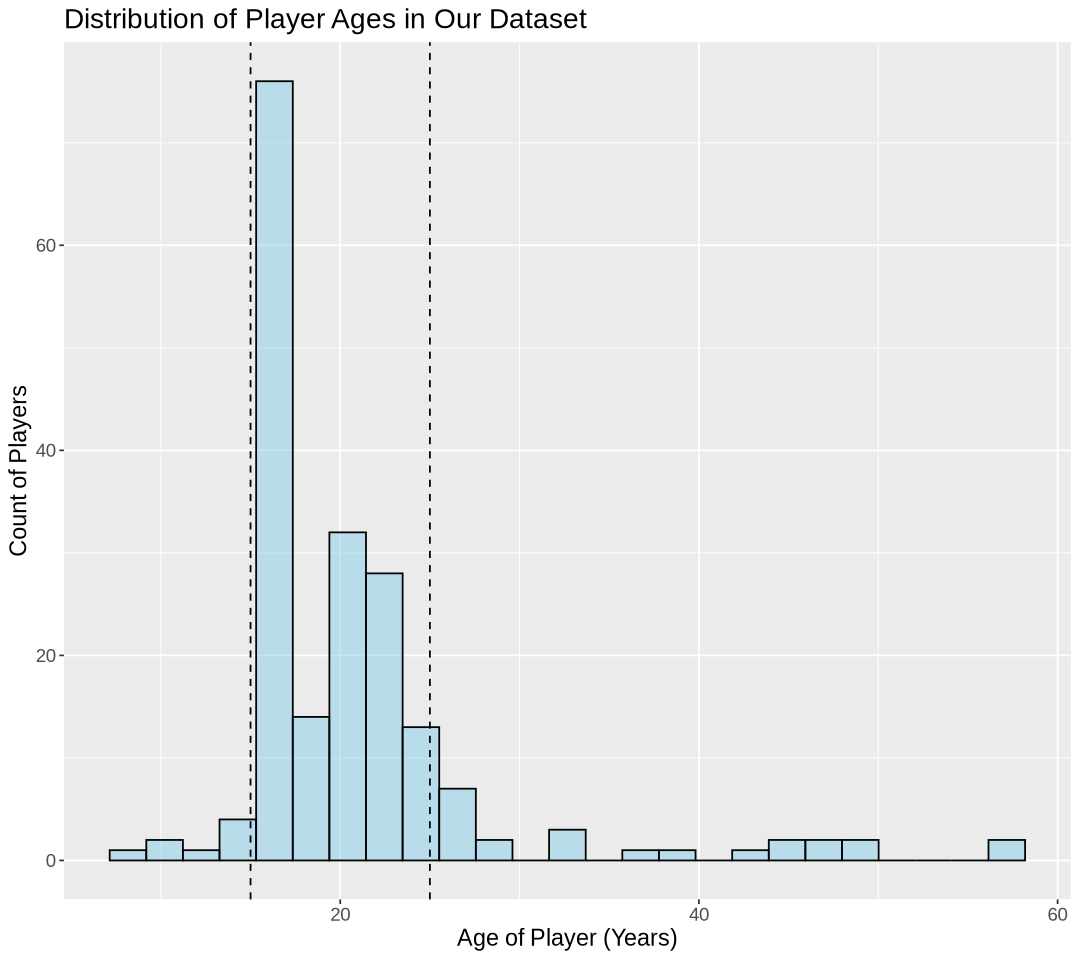

In [100]:
options(repr.plot.width = 9, repr.plot.height = 8)

age_dist_plot <- ggplot(players, aes(x = Age)) +
  geom_histogram(alpha = 0.5, color = "black", fill = "skyblue", bins = 25, na.rm = TRUE) +
  labs(
    x = "Age of Player (Years)",
    y = "Count of Players",
    title = "Distribution of Player Ages in Our Dataset") +
  theme(text = element_text(size = 14)) +
    geom_vline(xintercept = 15, linetype = "dashed") +
    geom_vline(xintercept = 25, linetype = "dashed") 
  
age_dist_plot

This visualization shows the distribution of player ages in the players.csv dataset. Here we see that most players fall between the ages of 15-25 (10 years). By adding dashed lines at ages 15 and 25, we see that very few observations fall outside of this range. For our analysis, we know that our results will not be as generalizable for predictions at extreme ages (outside 15-25) since these observations are underrepresented in the data.

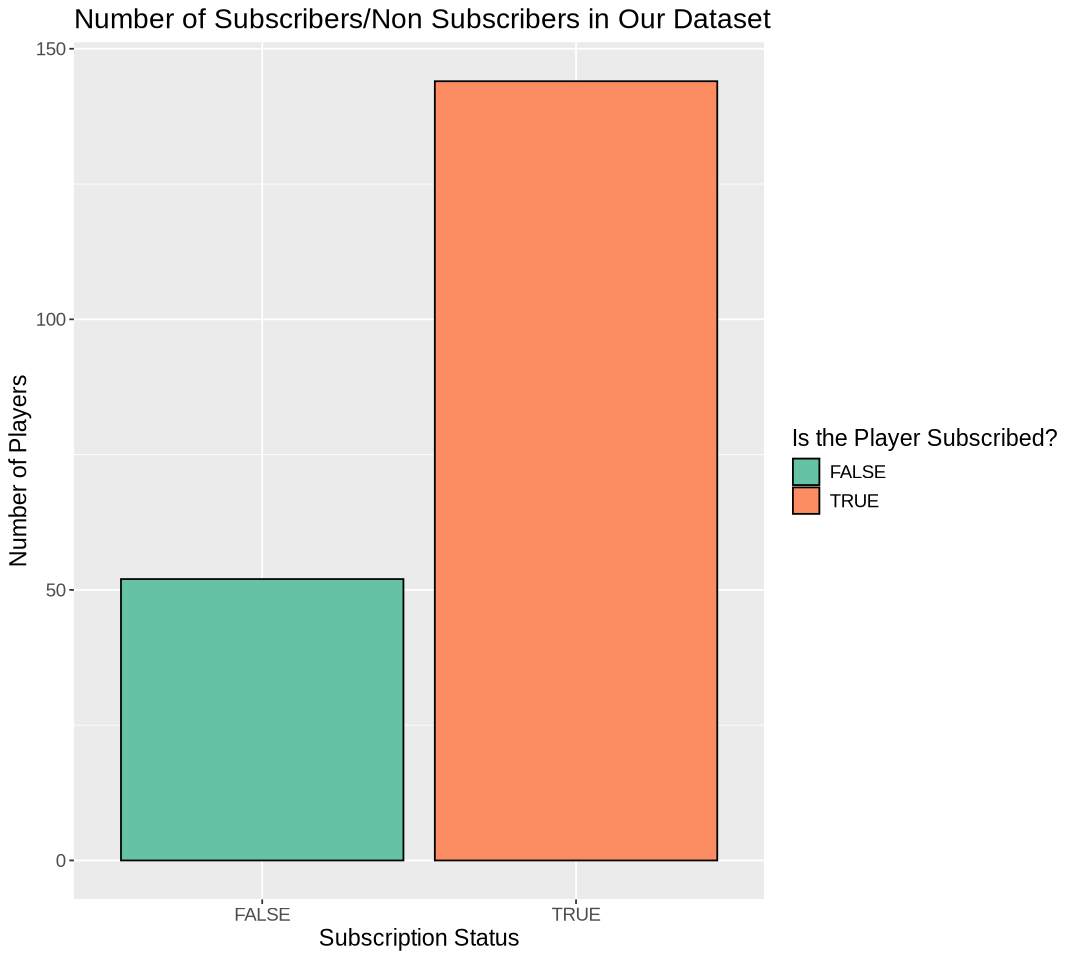

In [105]:
options(repr.plot.width = 9, repr.plot.height = 8)
sub_dist_plot <- ggplot(players, aes(x = subscribe, fill = subscribe)) +
  geom_bar(stat = "count", color = "black", na.rm = TRUE) +
  labs(
    x = "Subscription Status",
    y = "Number of Players",
    title = "Number of Subscribers/Non Subscribers in Our Dataset",
    fill = "Is the Player Subscribed?") +
    theme(text = element_text(size = 14)) +
    scale_fill_brewer(palette = "Set2")

sub_dist_plot

This visualization shows that in our dataset, far more individuals are subscribed to a game-related newsletter than not. In terms of a K-NN classification algorithm, this means that we may deal with **class imbalance**. If we're using the K-nearest neighbors, but there is an imbalance across classes, we may predict 'True' more often than 'False' simply because there are more instances of 'True' and it wins the majority vote as a result. We must be careful later on to use step_upsample to address this. 

Warning message in geom_histogram(stat = "count", color = "black", na.rm = TRUE):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


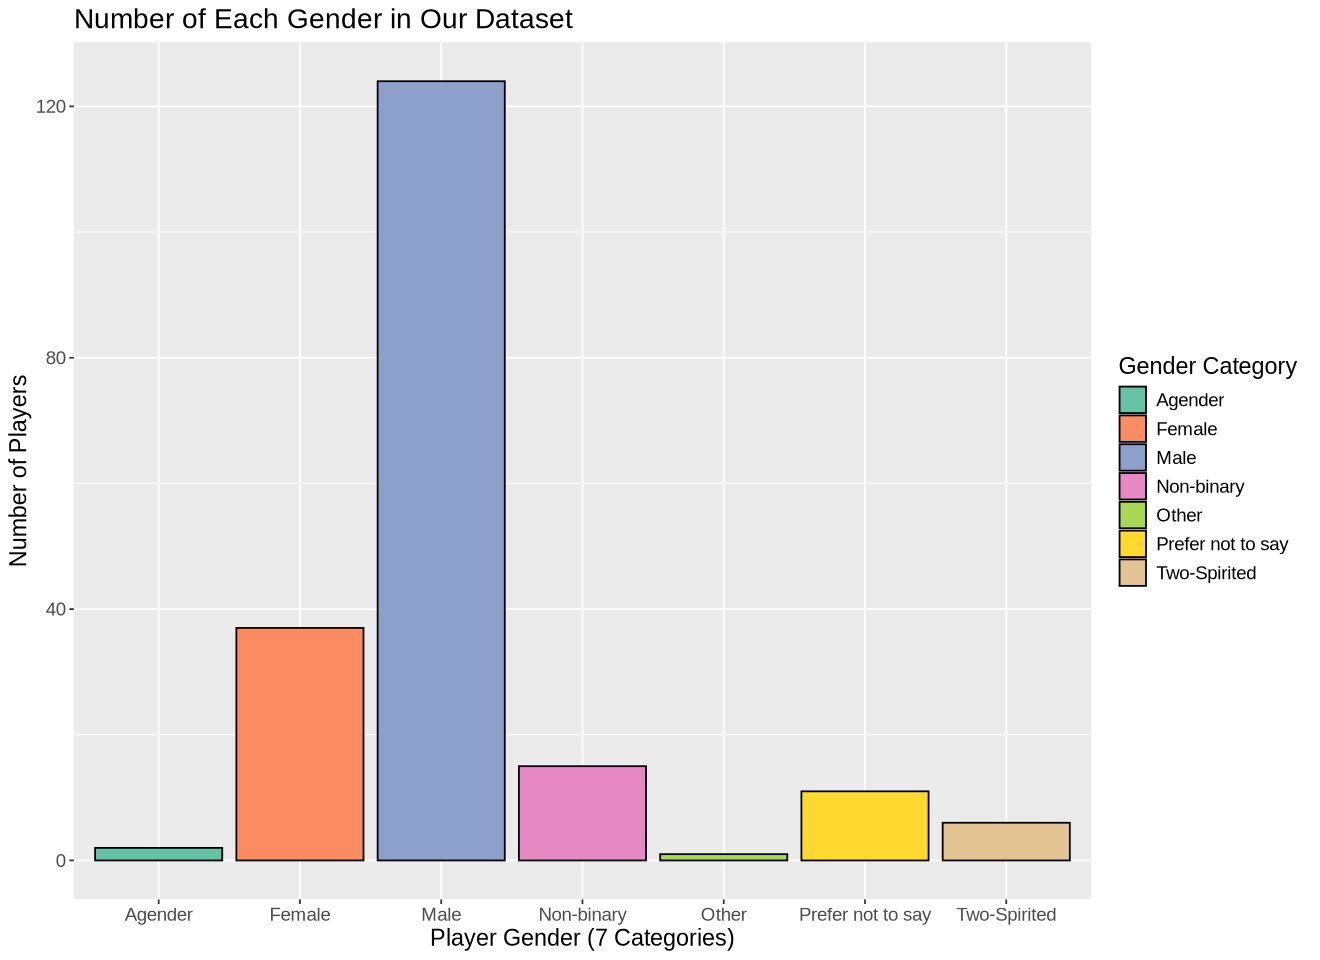

In [108]:
options(repr.plot.width = 11, repr.plot.height = 8)
gender_dist_plot <- ggplot(players, aes(x = gender, fill = gender)) +
  geom_histogram(stat = "count", color = "black", na.rm = TRUE) +
  labs(
    x = "Player Gender (7 Categories)",
    y = "Number of Players",
    title = "Number of Each Gender in Our Dataset",
    fill = "Gender Category") +
    theme(text = element_text(size = 14)) +
    scale_fill_brewer(palette = "Set2")

gender_dist_plot

### (4) Methods and Plan

To answer my predictive question, I will implement the K-NN classification algorithm, using age and hours played as the predictors for the response variable: subscription to a game-related newsletter. This method is appropriate as it can take key demographic variables and predict a classification, while also capturing non-linearity in the relationship of variables. Using a linear regression or other technique may miss this sort of relationship, while a K-NN classification algorithm can identify it. 

A key assumption for this method is that similar observations (in Euclidean distance) will share similar characteristics when it comes to classification variables (such as subscription status).

A potential limitation with this method is that if there are major imbalances between our two classes, we must scale up classes to make sure that a majority vote doesn't always go the same way. As well, the choice of K is crucial in the algorithm, and choosing incorrectly can lead to overfitting/underfitting.

I am going to process the data by first filtering player.csv by experience level into 5 separate subsets. For each, I will be splitting it into a training and testing dataset (75% training and 25% testing). Then, I will rescale and recenter the variables in each to make sure they are all comparable in my K-NN algorithm and contribute equally to the distance measures. To compare and select the model, I will use 5-fold cross-validation (through which the training set is split into 5 chunks, with each chunk being used once as the validation set for the other 4 chunks). By using cross-validation, I will be able to test a range of k-values, choosing one that avoids overfitting/underfitting and results in the highest accuracy.

### (5) GitHub Repository

https://github.com/Finnypiney/individual_project_finnp